Sai Saradha Kalidaikurichi Lakshmanan
EECS 531- Final Project Report

#                    <center><b>Building a Visual Question Answering System</b></center>

# Abstract

A Visual Question Answering (VQA) system was built and the performance of two different neural network models - Baseline Multi Layer Perceptron (MLP)<sup>1</sup> and Long Short Term Memory (LSTM)<sup>1</sup> - were compared with respect to their accuracy and loss. VQA is an interesting and complex AI task involving multiple disciplines such as Computer Vision, Natural Language Processing and Machine Learning where a machine is trained to answer questions about an image shown to it. In this project, I have used a deep learning approach to setup the VQA system by training the neural networks on the VQA V2.0 open-ended dataset<sup>2</sup>. Training was implemented on Google Cloud VM instances and evaluation of the trained model was performed locally. Training both the models for just 50 epochs resulted in promising results with accuracy values reaching 25.34% for MLP and 22.15% for LSTM, however, preliminary observations in extended training showed indications that LSTM outperforms MLP (data not shown).

# Introduction

### Overview
In the past few years, building solutions to AI problems involving multi-modal knowledge has emerged as an important topic of interest in the machine learning community.  Visual Question Answering system (VQA) is one such area that has gained wide interest in the recent years<sup>3</sup>. This task is considered to be AI-complete and it has a wide range of potential applications, such as, helping visually challenged people for instance. VQA involves understanding several features of images in substantial detail and then be able to answer questions about the image. Therefore, the input is a question-image pair and the output is a natural language answer. The most challenging part of building a VQA system is the dataset and the open-endedness of the entire setup<sup>3</sup>. Questions and answers are free-form and open ended, thereby, making it a difficult task. 

### Related Work

There has been numerous advances in the past few years on and around building a VQA system. Currently, the most widely used methods for VQA are deep learning based and non-deep learning models, such as regression based classifiers<sup>4</sup> are still in their early stages of development. The model in reference [5] is similar to our baseline MLP model but differ in that they first extract features from pretrained convolutional neural networks (CNN) and the word embedding vectors for text data are concatenated and then regression is performed. The LSTM based models (similar to the one used in this project) were later found to perform better than CNN + Bag of Words and related techniques. In these models, LSTM is used for text data (conditioning the question) and then combined with the image features. A more recent approach is using attention based models<sup>3</sup>. Attention techniques have been quite popular in this domain and they are reported to outperform other methods. It uses two forms of attention - Parallel and Alternating attention and the primariy difference between the two is how the question and image attend over each other. In parallel attention, the question and image attend over each other simultaneously while in the alternative approach, the image is iteratively attended followed by question and image and so on. Other contributions to VQA also comes from two related tasks - Text based question answering systems and Image captioning.

### Technical Background

In this project, we have used a deep learning approach and hence a short description of three main types of neural networks used in the architecture is given below.

#### Multi Layer perceptrons
Multilayer perceptrons are a type of feedforward artificial neural networks (ANN) with linear/non-linear activation functions (Fig.1). They learn the target concept by backpropagating the gradients and updating them to reduce a loss function. There are different types of loss functions and in this project we have used cross-entropy as it is one of the commonly used loss functions in VQA problems. The non-linear activation functions such as sigmoid, tanh and relu are commonly used. In this project we have used tanh non-linearity as mentioned in reference [1]. The goal of these networks is to learn the weights and biases that optimize the objective function (loss function) and learn the target concept correctly.

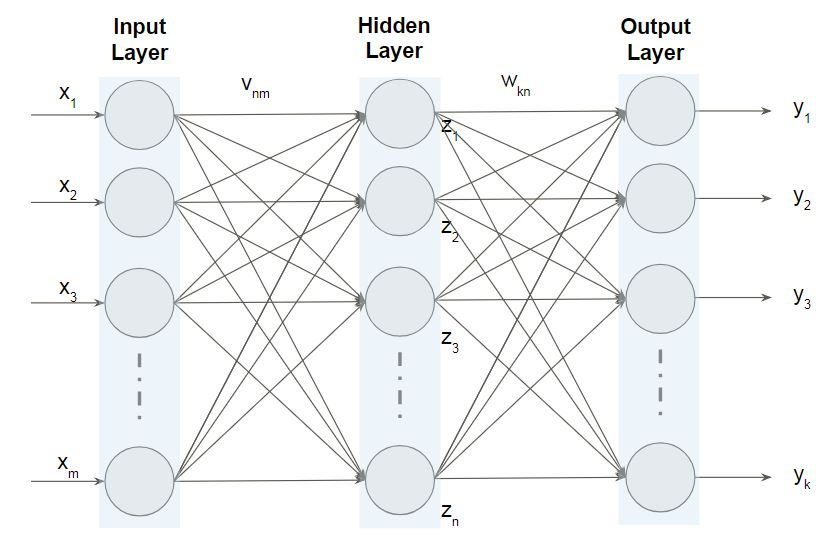

<center><b>Figure 1:</b>Schematic of a MLP ANN</center>

#### Convolutional Neural Networks (ConvNets) 
ConvNets are primarily used for images and have 3D neurons (the third dimension being along the depth). Each ConvNet has one or more of the following layers (Fig.2) - Input, Conv, ReLu or activation layer, Pooling layer (eg. max pooling) and Fully Connected (FC) layer. A thorough description of ConvNets and the properties of the individual layers are convered in reference [6]. 

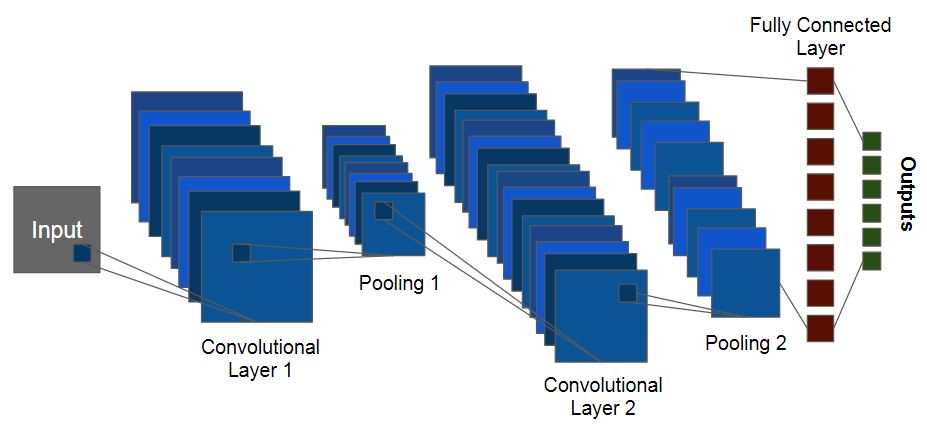
<center><b>Figure 2:</b>Schematic of a ConvNet</center>

<b>VGGNet</b>: The image features in our project are generated from a pretrained VGG neural net<sup>7</sup>. Therefore, we briefly describe the architecture of the VGG net here. The ImageNet challenge<sup>8</sup> triggered the development of many of the popular neural net models that are in wide use today and one of them is the 16 layer VGG net by Simonyan and Zisserman<sup>7</sup>. The architecture of this neural network is shown below (Fig.3a,b):

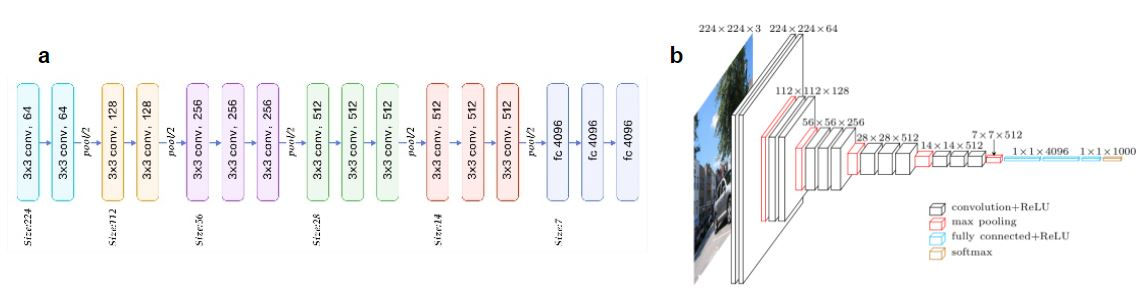!
<center><b>Figure 3:</b>Schematic of a VGGNet</center>

This network has about 16 Conv/FC layers and has 3x3 convolutions in all layers. The disadvantage of this network is the large number of parameters involved (in the order of 1.6M) which made it too slow and expensive. There has been several models that were developed later for reducing the parameters and still remain deep with good accuracy (for example reference [9])

#### Long Short Term Memory (LSTM) RNNs
LSTMs are a type of recurrent neural networks (RNN) that act as a solution for the long-term dependency problem of RNNs. Specifically, in certain instances, it is insufficient to just remember the input at previous time step alone, instead the networks may have to remember context from several previous timesteps and this is a problem with vanilla RNNs. LSTMs have a chain like structure (Fig. 4) with each repeating module in the structure consisting of four type of layers and gate like structures to control the cell state. The forget gate layer is the first layer that decides what information passes on to the next state and this is a sigmoid layer. Once the RNN has decided what to forget, the next step is to decide what to store and that is taken care of by the input gate layer following which a state update happens. The output of the cell is given by passing this updated state value through a sigmoid function and multiply that with the same cell state passed through a tanh function. 

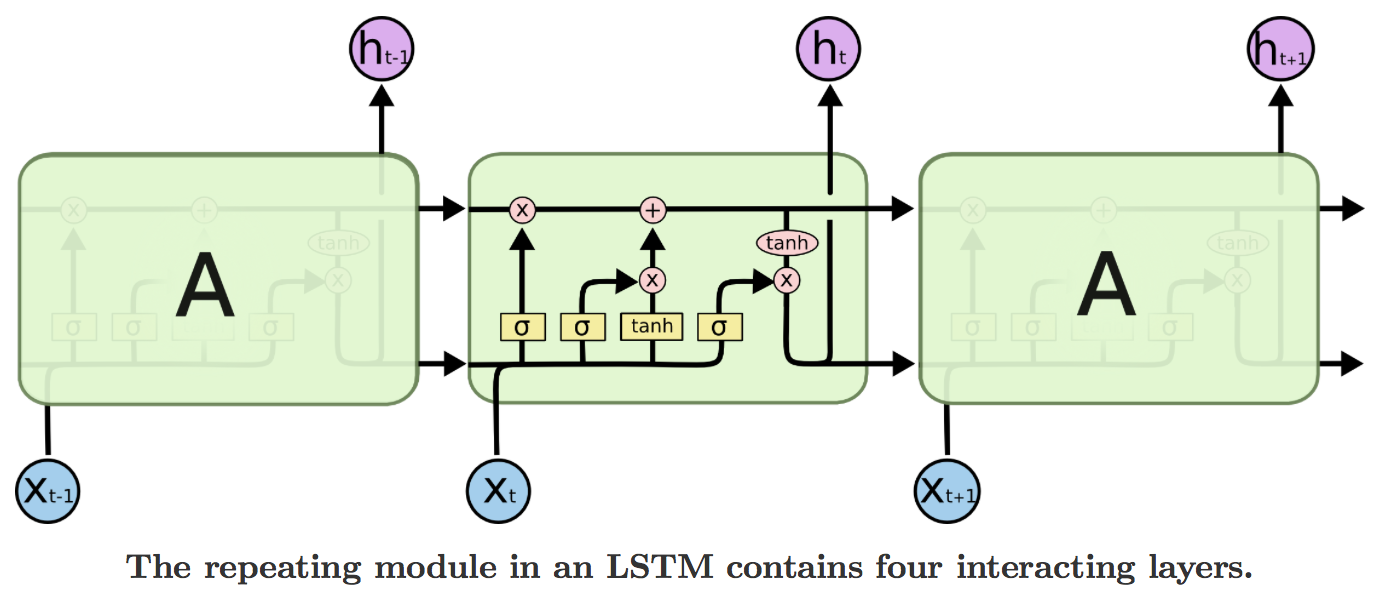
<center><b>Figure 4:</b>Schematic of the LSTM RNN[]</center>


# Environment Setup and Methods

## Dataset
We have used the VQA V2.0 dataset for training and evaluating the models<sup>2</sup>. VQA V2.0 includes about 3.8M questions on about 82,000 images and the validation set has about 2M questions on about 40,000 images. The earlier version of this dataset had abstract scene image-question-answer triplets, but V2.0 uses only the MS COCO dataset<sup>10</sup>. The COCO dataset images were annotated by  mechanical turks. The dataset questions and answers are open-ended and designed in a way that requires the image to be input for the machine to provide the answer (instead of asking any generic question). The dataset has questions of different types - What, Where, How much/many, When, etc., According to the team that did the dataset collection<sup>1,2</sup>, about 89% of the data has single word answers and most of them containing less than or utmost 3 words. About 38% of the training data includes yes/no type questions and this means that they are the majority values. They also say that about 58% of yes/no questions are yes (and this also shows in our interesting observation while evaluating the trained model discussed in the results section). The ground truth for test data is not provided hence we used the validation data for testing the models. Some of the other popular datasets are DAQUAR, Visual7W and Coco-QA. Sample images from VQA dataset are shown below (Fig.5).

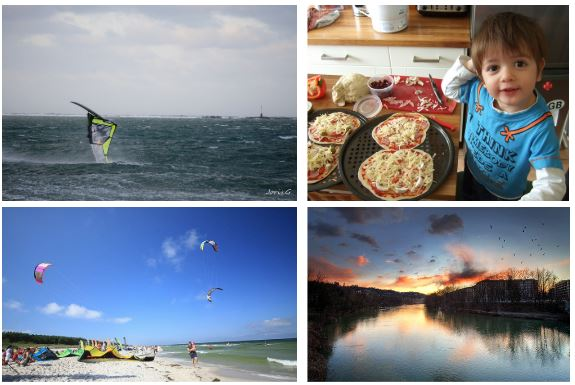
<center><b>Figure5.</b>Sample images from the VQA V2.0 dataset</center>

For generating the image features, the pretrained VGGNet model was used. Infact, the features generated from the VGG16 net is available as .mat file (MATLAB data) for download and this saves some time during training and evaluation since we now directly have the features. For embedding the text data and generating the word vectors, we used the Stanford's Glove Model<sup>11</sup>. This model seems to have produced great results and we used the model that was trained on Common Crawl dataset with 2M vocab and 8B tokens. Loading this word vec dataset before beginning training and evaluation was a bit long but helped neverthless.

## Machine requirements
All of the training for the two models were done in Google Cloud. We used two VM instances on the Google Cloud (one with 8core CPU and the other with a NVIDIA Tesla K80 GPU). These cloud compute engines are charged per hour and we get a free $300 credit and fortunately we were able to run the project without exhausting the credits! Both the instances ran on Ubuntu 16.04 and we used Python3.6 and Tensorflow 1.7 on the instance. Evaluation is faster hence evaluation were done locally on a Windows 7 (x64) machine equipped with 8GB RAM.

## Method

Both the models used here are described in reference [1]. While, they are not the current state of art, they serve as good models for preliminary exploration into the VQA domain. The input to these networks are question-image pairs. For training, the answers are also input to compute the cross entropy loss over iterations. In both cases we begin by first loading the Glove model data (word-vectors for over 2.2 M vocab words). Then from the question-answer-image triplet, we only select those that have the top 1000 frequent answers from the training dataset. As stated in reference [1], these top 1000 frequent answers contribute to about 80% of the answers to the VQA dataset, hence we only took those records for training. We then load the VGGNet features for the COCO images and then start building the corresponding models.

### Approach 1 - MLP (BoW + CNN + 2 layer MLP) 
We followed the implementation similar to that mentioned in reference [1]. The network model has 2 hidden layers with dropout and tanh activation (Fig.6). First, each token in the question has a corresponding 300 dimensional word vector that are summed up together and form the bag of features. The image features generated from VGGNet are 4096 dimensional each and before feeding the input to the MLP model, these two set of feature vectors are concatenated (resulting in 4396 dimensional input vector). Each hidden layer had 1024 neurons and the final output layer also has a softmax estimation and the cross entropy loss is calculated from that. For prediction, argmax(softmax normalization) gives the corresponding class (1000 classes/answers as described earlier). The graph of the network designed for this study (using TensorFlow) is shown in Figure 7. Figure 8 shows the zoomed graph with the variables and operations involved in the computation.

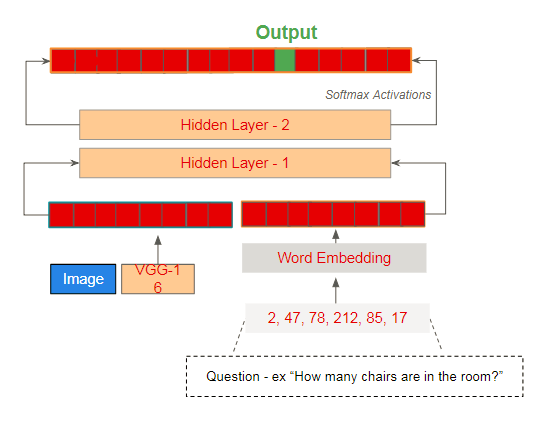
<center><b>Figure 6.</b> MLP Model</center>

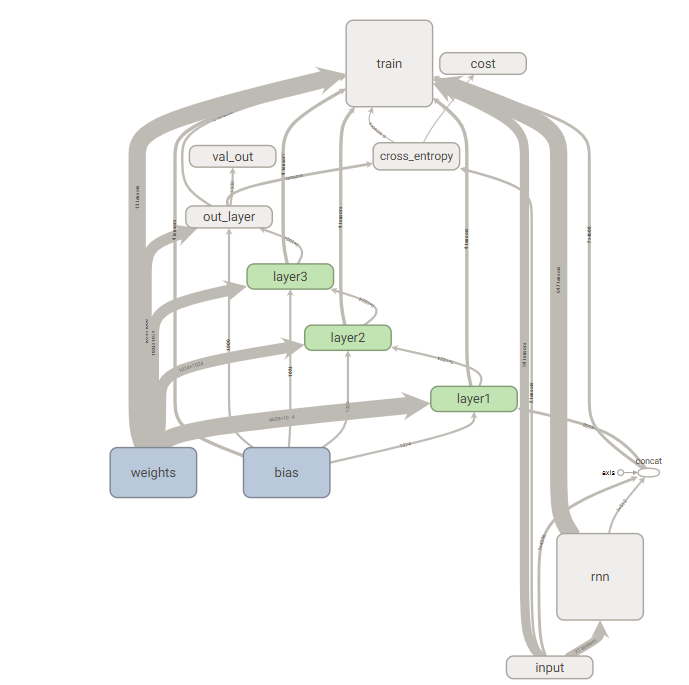
<center><b>Figure 7.</b> Network Graph used in this study (TensorFlow graph)</center>

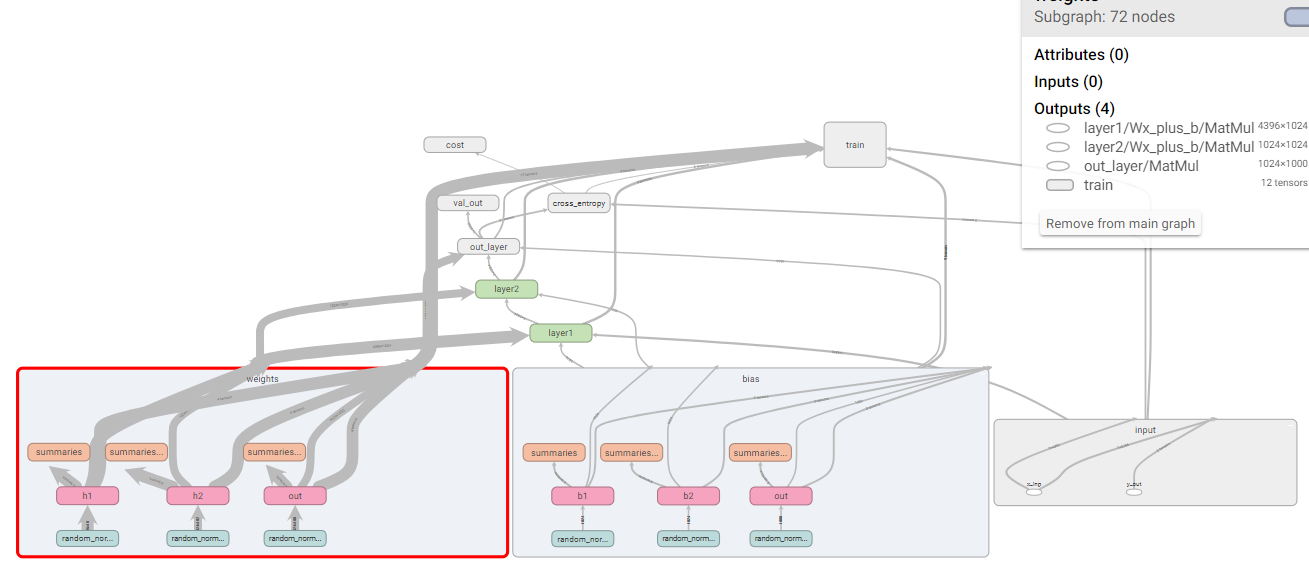
<center><b>Figure 8.</b> A zoomed-in representation of the network Graph from Fig.7</center>

### Approach 2 - LSTM
In this method, we first build a single layer LSTM for embedding the questions (Fig. 9). A single layer LSTM's final state (512 dimensional) embedding for the query is then concatenated with the 4096 dimensional image feature vector and input to three fully connected layers (each with 1024 neurons) with dropout (0.5) and tanh activation. The batch size for both models was 256.

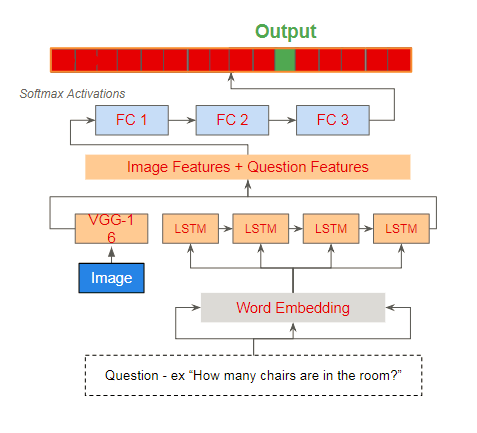
<center><b>Figure 9.</b> LSTM Model </center>


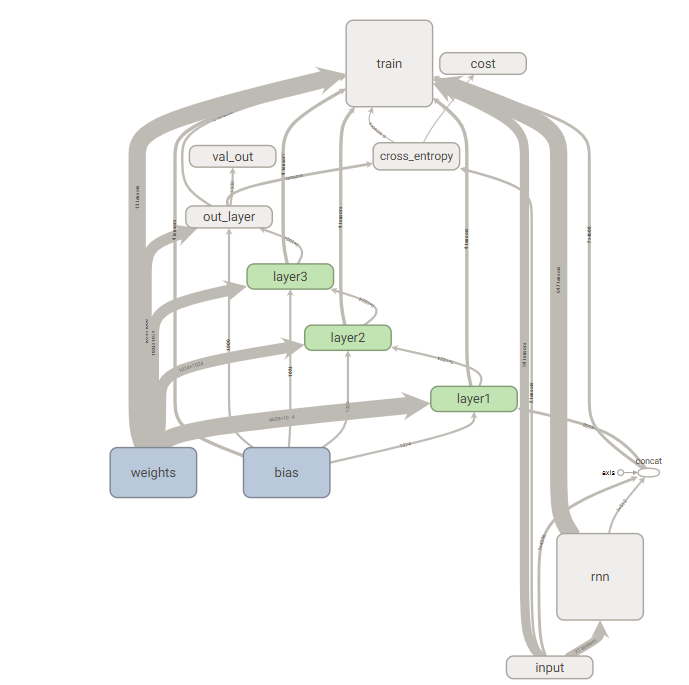
<center><b>Figure 10.</b> LSTM Network Graph built for this study (using TensorFlow)</center>

Once these models have been built and trained, they are evaluated on the validation dataset. The model with graph metadata and the weights were saved in the directory and then evaluated locally by loading the model in tensorflow default graph. The softmax predictions from the output layer is taken and argmax of it gives the class. Once the class is obtained, we do an inverse transform of the word embedding to obtain the actual response to the question.

# Experimental Results

The performance metric used is accuracy. To calculate accuracy, the recommended evaluation metric stated in reference [1,2] is,

<b>Accuracy(response)</b> = min((#of humans that gave the specific response)/3, 1)

This means that to consider the algorithm's response to be fully correct (implying score of 1), atleast 3 of the 10 humans should have given that answer. If less than three people have given the same answer, then (# of human answered response)/3 is chosen as the score. The final accuracy is obtained by summing up all scores and dividing by the total length of questions.

## Results
The time taken to train each epoch for batch size of 256 was about 6 minutes on VM Instance 1 with CPU only for MLP and about 8 minutes on VM Instance 2 with GPU. Since we had only one GPU, it was not extremely efficient in speeding up the training process. Both models were trained only for 50 epochs to accommodate the constraint on time and free-cloud space allocation. 

### Loss Function 
As we can observe from the graphs below, the loss has consistently decreased over epochs.

<b>a. MLP:</b>

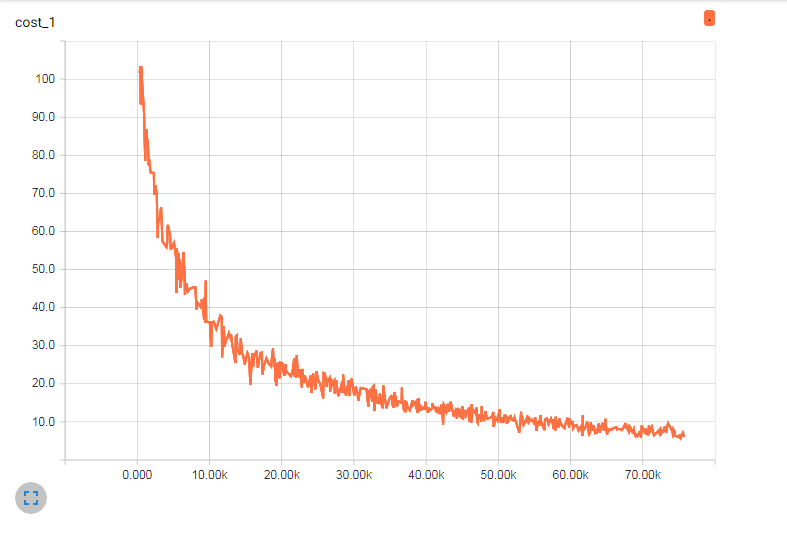
<center><b>Figure 11.</b>Loss value versus Number of Iterations showing consistent decrease in average loss over iterations for MLP</center>
  
In the graph below (Fig. 12), we plot a custom graph (written using a custom TensorFlow routine) that displays the change in weight matrix, for layer 1 of the MLP network, over iterations. 

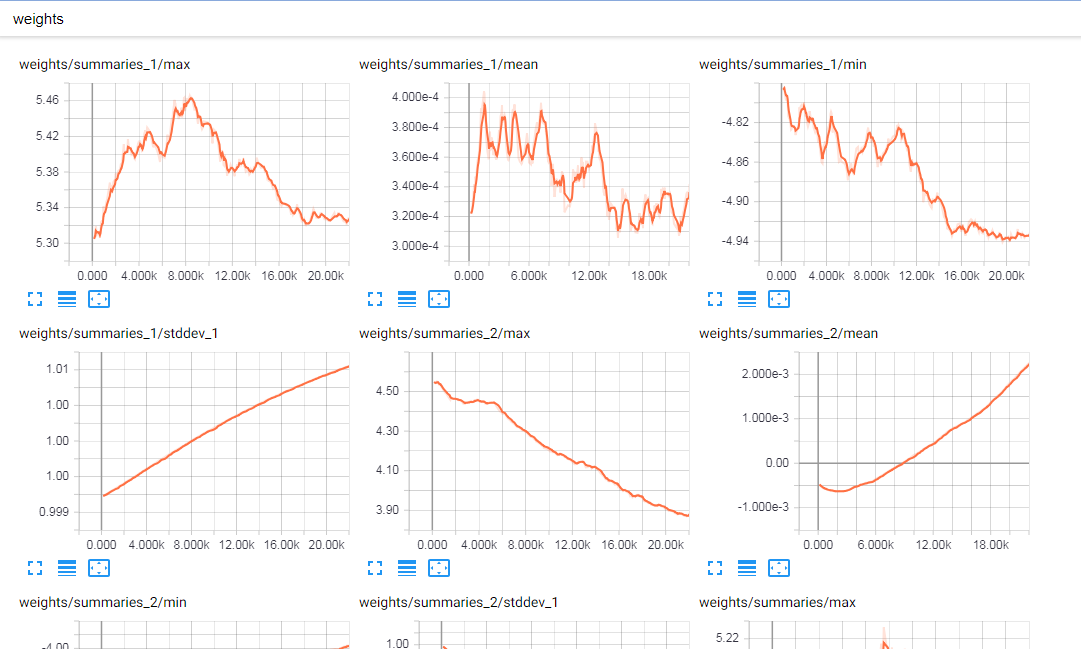
<center><b>Figure 12.</b>Layer 1  weight matrix statistics</center>

Figure 13 are the PCA results (default TensorFlow analysis) for the weight matrix of output layer. 

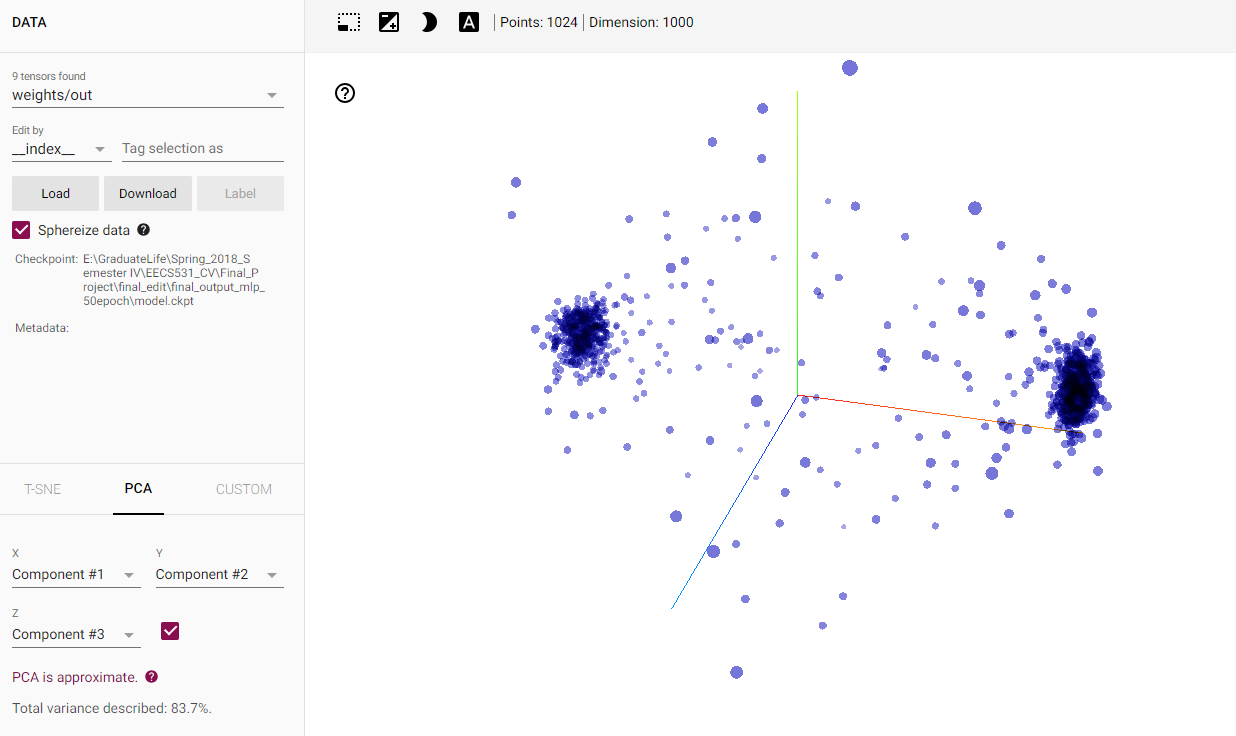
<center><b>Figure 13.</b>PCA results for the weight matrix of output layer</center>

Finally, Figure 14 shows the a snapshot of the final output VM instance screen at the end of the training phase displaying the loss value at each iteration.

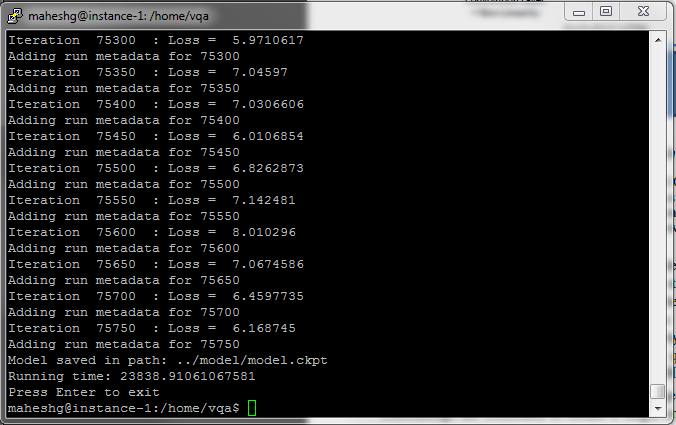
<center><b>Figure 14.</b>Final output snapshot of training phase</center>


<b>b. LSTM:</b>

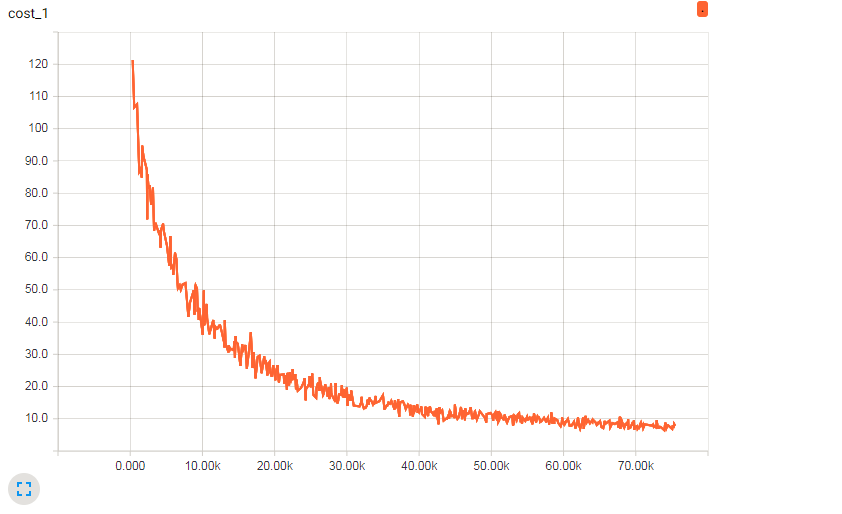
<center><b>Figure 15.</b>Loss value versus Number of Iterations showing consistent decrease in average loss over iterations for LSTM</center>

### Sample Outputs from the VQA evaluation

The images shown below are examples of outputs from the VQA evaluation.  The response to the image-question pair input to the trained model show the efficiency of the model in answering open-ended questions. Note that some of the answers are more than 1 word. 

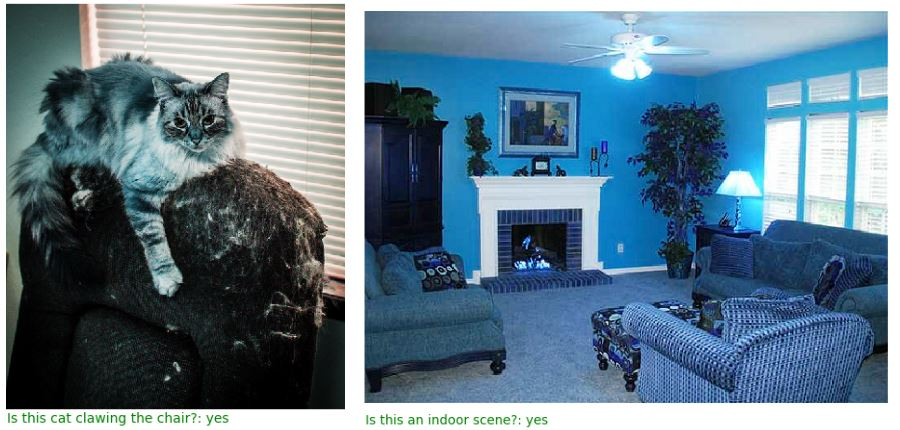
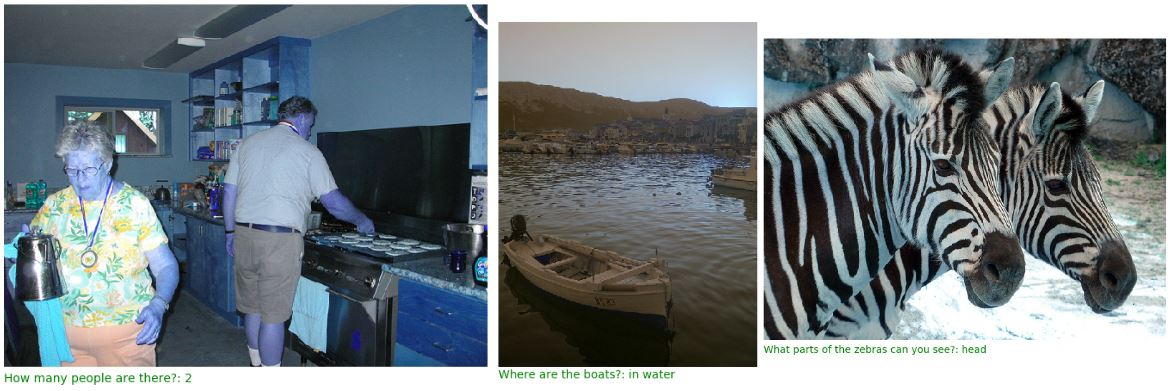
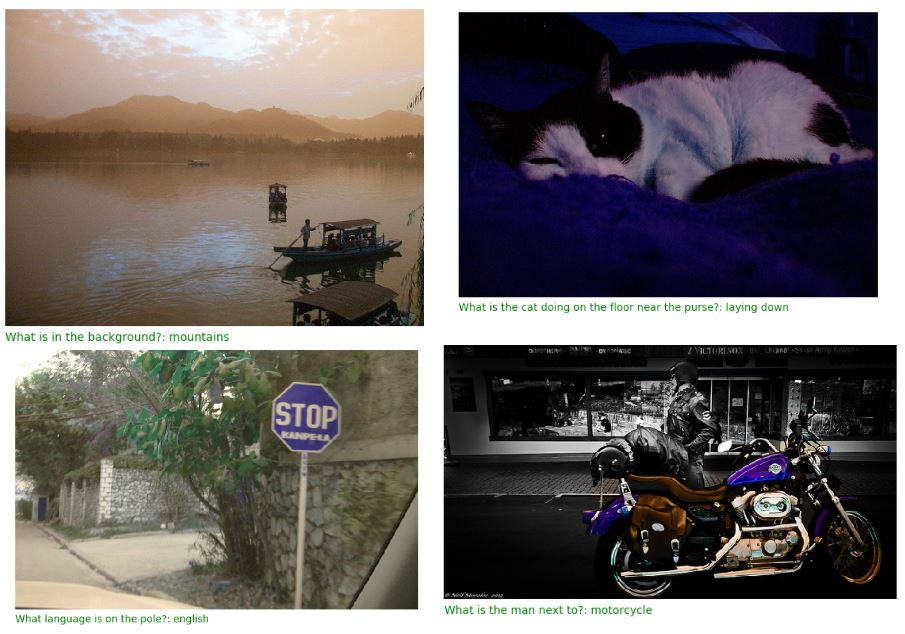
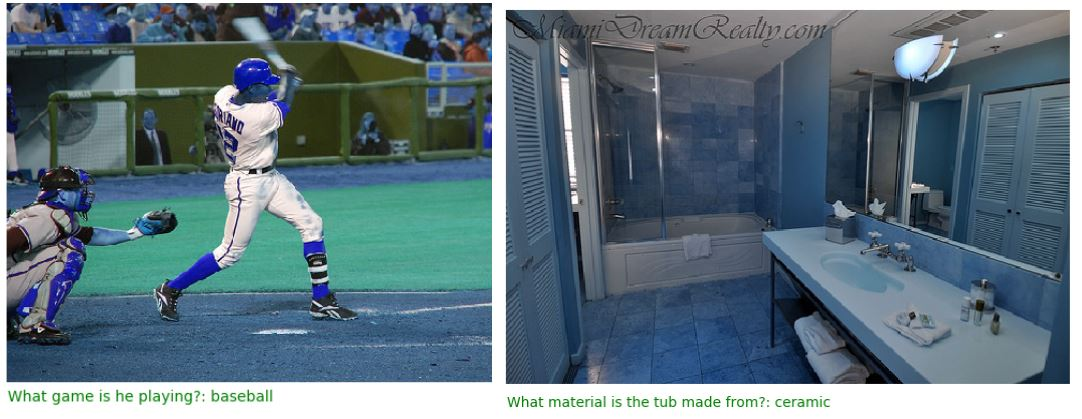

The images shown below are examples of incorrect responses from the model. 

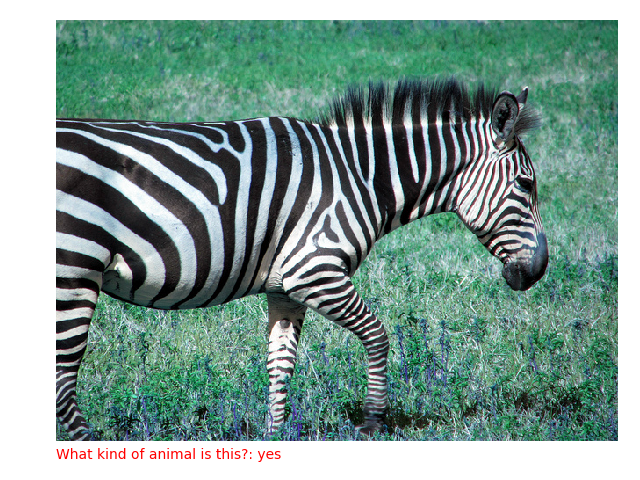

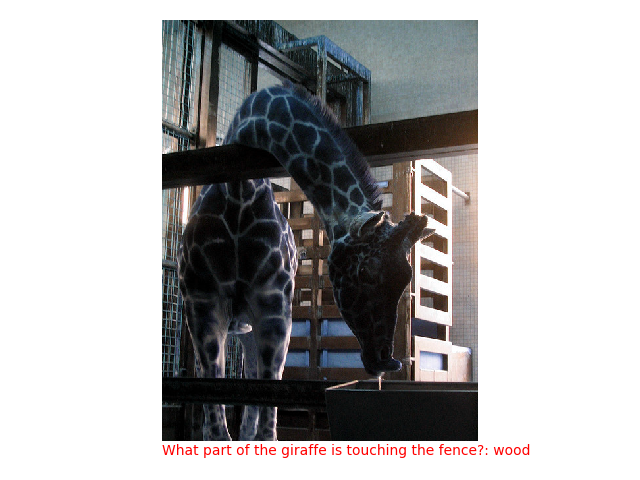


# Observation

One interesting observation from the results is that the model seemed to have learnt the 'yes' response quite well. Out of the correct responses, 85% of them were answered as 'yes' and only the remaining 15% of the right responses were general language answers and also numbers. This is only from training the model for 50 epochs and the model's steady learning process shows that given more epochs of training, it would definitely perform better and equal to the state of art accuracy measures. Similarly LSTM seems to have learnt the 'no' response, as more than 85% of the right responses were answered as no. But these results are only with 50 epochs. We were able to run the training for 100 epochs and saw good drops in the cross entropy loss, however due to an internet disconnect problem the model did not get saved and we were unable to run the evaluation for the training done on 100 epochs. We would also like to do a lot of variations to the models such as changing the non-linearities, varying dropout raitos, etc., to see how the performance improves, but we did not have enough time to run those experiments and include the results in this report. But we will continue to experiment with the models. While the current state of art in VQA is about 50%, the accuracy of our model (~ 25%) is expected given that the model was trained only for 50 epochs.

# Code:
from Config_Manager import *
from stats_calc import *
from utils import *
from visualize import *
from vqa_model1_mlp import *
from vqa_model2_lstm import *
from vqa_model3_attn import *
from vqa_model4_mcb import *

#import required libraries
import numpy as np
import json
import time
import spacy
import scipy
import scipy.io
from spacy.lang.en import English
import tensorflow as tf
from sklearn import preprocessing
from sklearn.externals import joblib
import operator
from itertools import islice
from keras.utils import np_utils
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.python.tools import inspect_checkpoint as chkp


class VQA_Class:

    def __init__(self):
        #set all hyperparameters of the network models here (common to all the four models)
        # first get the unzipped required files
        self.train_ques_f = "../text_data/v2_OpenEnded_mscoco_train2014_questions.json"
        self.train_annot_f = "../text_data/v2_mscoco_train2014_annotations.json"
        self.val_ques_f = "../text_data/v2_OpenEnded_mscoco_val2014_questions.json"
        self.val_annot_f = "../text_data/v2_mscoco_val2014_annotations.json"
        self.test_ques_f = "../text_data/v2_OpenEnded_mscoco_test2015_questions.json"
        self.GloVe_f = "../pretrained/glove.840B.300d.txt"
        # Glove embedding - word vectors initialize:
        self.word_vec = {}
        self.token_getter = English()

        self.train_que_fn = "../text_data/train_que_mod.txt"
        self.train_queid_fn = "../text_data/train_queid_mod.txt"
        self.train_ans_fn = "../text_data/train_ans_mod.txt"
        self.train_quelen_fn = "../text_data/train_quelen_mod.txt"
        self.train_imgid_fn = "../text_data/train_imgid_mod.txt"

        self.val_que_fn = "../text_data/val_que_mod.txt"
        self.val_ans_fn = "../text_data/val_ans_mod.txt"
        self.val_imgid_fn = "../text_data/val_imgid_mod.txt"
            

        self.train_que_final = []
        self.train_ans_final = []
        self.train_img_final = []
        self.top_n = 1000

        self.vgg_model = "../image_data/coco/vgg_feats.mat"
        self.vgg_coco = "../model/coco_vgg_IDMap.txt"
        self.vgg_coco_map = {}
        self.num_cat = 0
        self.numeric_ans = preprocessing.LabelEncoder()
        self.img_features = []

        self.log_dir = os.path.join(os.getenv('TEST_TMPDIR', '/tmp'), '/tensorflow/final_project/logs/mlp_with_summaries')

        self.pred_fn = "../model/final_pred_results.txt"
        self.pred_flag_fn = "../model/final_pred_flag.txt"

    def take(self, n, iterable):
        "Return first n items of the iterable as a list"
        return list(islice(iterable, n))
                
    def load_GloVe_embed(self):
        print("Loading Glove Model")
        count_diff = 0
        f = open(self.GloVe_f, 'r', encoding='utf-8')
        count_max = 100
        count = 0
        for line in f:
            #if count >= count_max:
                #break
            try:
                splitLine = line.split()
                word = splitLine[0]
                embedding = np.array([float(val) for val in splitLine[1:]])
                self.word_vec[word] = embedding
            except Exception:
                count_diff += 1
                print(len(splitLine))
                vec = splitLine[-300:]
                embedding = np.array([float(val) for val in vec])
                # word = list(set(splitLine)-set(vec))
                # word = ''.join(word)
                word_len = len(splitLine)-300
                word = splitLine[:word_len]
                word = ''.join(word)
                self.word_vec[word]=embedding
            if len(self.word_vec)%100000 == 0:
                print(len(self.word_vec))
            #count += 1
        #print(self.take(100, self.word_vec.items()))
        print ("Done. ",len(self.word_vec)," words loaded!")
        print("Total " + str(count_diff) + " number of words different structure")
        return

    def get_word_vec(self, word):
        try:
            if isinstance(word, str):
                word = word.lower()
            return self.word_vec[str(word)]
        except Exception as e:
            #print('error while getting word vec for ', word)
            #print(repr(e))
            return None            

    def get_token(self, sentence):
        return self.token_getter(sentence)

    def get_vgg_coco_map(self):
        map_file = open(self.vgg_coco, 'r')
        for line in map_file:
            split_line = line.split()
            self.vgg_coco_map[split_line[0]] = int(split_line[1])
        return

    def write_data_file(self, choice):
        # now get the filenames where we will be writing the modified data
        if choice=='train':
            json_que = json.load(open(self.train_ques_f, 'r'))
            json_annot = json.load(open(self.train_annot_f, 'r'))
            que_fn = open(self.train_que_fn,'w')
            queid_fn = open(self.train_queid_fn,'w')
            ans_fn = open(self.train_ans_fn,'w')
            quelen_fn = open(self.train_quelen_fn,'w')
            imgid_fn = open(self.train_imgid_fn,'w')
            annot_loaded = json_annot['annotations']
        elif choice=='val':
            json_que = json.load(open(self.val_ques_f, 'r'))
            json_annot = json.load(open(self.val_annot_f, 'r'))
            que_fn = open(self.val_que_fn,'w')
            queid_fn = open("../text_data/val_queid_mod.txt",'w')
            ans_fn = open(self.val_ans_fn,'w')
            quelen_fn = open("../text_data/val_quelen_mod.txt",'w')
            imgid_fn = open(self.val_imgid_fn,'w')
            annot_loaded = json_annot['annotations']
        elif choice=='test':
            json_que = json.load(open(self.test_ques_f, 'r'))
            json_annot = None
            que_fn = open("../text_data/test_que_mod.txt",'w')
            ans_fn = None
            queid_fn = open("../text_data/test_queid_mod.txt",'w')
            quelen_fn = open("../text_data/test_quelen_mod.txt",'w')
            imgid_fn = open("../text_data/test_imgid_mod.txt",'w')
            annot_loaded = None
        else:
            raise RuntimeError('Incorrect choice for writing modified data')
        questions_loaded = json_que['questions']
        print("Writing " + str(choice))
        # we will write the foll- questions, question id, answers, image id for coco dataset, length of questions
        print(len(questions_loaded))
        for que_len, quest in zip(range(len(questions_loaded)),questions_loaded):
            que_fn.write(quest['question']+'\n')
            queid_fn.write(str(quest['question_id'])+'\n')
            if annot_loaded is not None:
                ans_temp = self.get_ans_per_choice(choice, annot_loaded[que_len]['answers'])
                ans_fn.write(ans_temp)
                ans_fn.write("\n")
            quelen_fn.write(str(len(self.get_token(quest['question'])))+'\n')
            imgid_fn.write(str(quest['image_id'])+'\n')
            if ((que_len/len(questions_loaded))*100)%100 == 0:
                print(str(que_len/len(questions_loaded)) + " % done")
        print("100% done")
        que_fn.close()
        queid_fn.close()
        quelen_fn.close()
        imgid_fn.close()
        if ans_fn is not None:
            ans_fn.close()
        return

    def get_max_ans(self, ans_temp):
        count_freq_ans = {}
        num_ans = 10
        for i in range(num_ans):
            count_freq_ans[ans_temp[i]['answer']] = 1
        for j in range(num_ans):
            count_freq_ans[ans_temp[j]['answer']] += 1
        return max(count_freq_ans.items(), key=operator.itemgetter(1))[0]
    
    def get_ans(self, ans_temp):
        num_ans = 10
        ans_for_que = []
        # each question has 10 answers (we can see in file that there are 10 answer ids)
        for i in range(num_ans):
            ans_for_que.append(ans_temp[i]['answer'])
        return ';'.join(ans_for_que)

    def get_ans_per_choice(self, choice, annot):
        if choice == 'train':
            return self.get_max_ans(annot)
        return self.get_ans(annot)

    def get_most_frequent_set(self):
        count_freq_ans = {}
        ans_fn = open(self.train_ans_fn,'r').read().splitlines()
        que_fn = open(self.train_que_fn,'r').read().splitlines()
        img_fn = open(self.train_imgid_fn,'r').read().splitlines()
        
        for ans in ans_fn:
            if ans in count_freq_ans:
                count_freq_ans[ans] += 1
            else:
                count_freq_ans[ans] = 1
        count_freq_sorted = sorted(count_freq_ans.items(), key=operator.itemgetter(1), reverse=True)
        count_freq_sorted = count_freq_sorted[0:self.top_n]
        final_ans, ans_count_freq = zip(*count_freq_sorted)
        for q, a, i in zip(que_fn, ans_fn, img_fn):
            if a in final_ans:
                self.train_que_final.append(q)
                self.train_ans_final.append(a)
                self.train_img_final.append(i)
        print(len(self.train_que_final))
        print(len(self.train_ans_final))
        print(len(self.train_img_final))
        return
    
    def get_data_in_format(self):
        # the data to be prepared are the foll - questions, question_ids, annotations, answers
        # and we need to do this for train, val and test
        self.write_data_file('train')
        self.write_data_file('val')
        self.write_data_file('test')
        # we select only the top 80% of answers and the questions that have the corresponding answers (rest are not considered)
        self.get_most_frequent_set()
        return

    def get_que_vec_lstm(self, q, num_cells):
        x_batch = np.zeros((len(q), num_cells, txtdim_mlp))
        for i in range(len(q)):
            tokens = self.token_getter(q[i])
            for j in range(len(tokens)):
                this_vec = self.get_word_vec(tokens[j])
                if this_vec is not None and j<num_cells:
                    x_batch[i,j,:] = this_vec
        return x_batch

    def get_que_vec(self, q):
        x_batch = np.zeros((len(q), txtdim_mlp))
        for i in range(len(q)):
            tokens = self.token_getter(q[i])
            for j in range(len(tokens)):
                this_vec = self.get_word_vec(tokens[j])
                if this_vec is not None:
                    x_batch[i,:] += this_vec
        return x_batch

    def get_ans_vec(self, a):
        ans_batch = self.numeric_ans.transform(a)
        num_class = self.numeric_ans.classes_.shape[0]
        ans_batch = np_utils.to_categorical(ans_batch, num_class)
        '''except Exception:
            print('exception while getting ans vec')
            ans_batch = self.numeric_ans.transform(str(a))
            num_class = self.numeric_ans.classes_.shape[0]
            ans_batch = np_utils.to_categorical(ans_batch, num_class)'''
        return ans_batch

    def get_img_vec(self, i):
        vgg_feat_dim = self.img_features.shape[0]
        img_batch = np.zeros((len(i), vgg_feat_dim))
        for j in range(len(i)):
            img_batch[j,:] = self.img_features[:,self.vgg_coco_map[i[j]]]
        return img_batch

    def get_input_for_nn_model(self, q, a, i):
        return self.get_que_vec(q), self.get_ans_vec(a), self.get_img_vec(i)

    def visual_results(self):
        val_pred = open(self.pred_fn, 'r').read().splitlines()
        flag_fn = open(self.pred_flag_fn, 'r').read().splitlines()
        ans_fn = open(self.val_ans_fn,'r').read().splitlines()
        que_fn = open(self.val_que_fn,'r').read().splitlines()
        img_fn = open(self.val_imgid_fn,'r').read().splitlines()
        # open image directory:
        #img_dir = "../raw_images/val2014/COCO_val2014_"
        img_dir = "F:/imgs/val2014/COCO_val2014_"
        total_num = 12
        count = 0
        font = cv2.FONT_HERSHEY_SIMPLEX
        for q, gt, pred, imid, flag_p in zip(que_fn, ans_fn, val_pred, img_fn, flag_fn):
            imid_full=imid.zfill(total_num)
            img_name = img_dir + imid_full + ".jpg"
            if flag_p==str('1'):
                #color_choice = (0,255,0)
                color_choice = 'green'
            else:
                #color_choice = (0,255,0)
                color_choice = 'red'
                
            #if (flag_p == 1) or (count%1000) == 0:
            #if flag_p==str('1') or (count%1000==0):
            if count%1000==0:
                img = cv2.imread(img_name)
                plt.figure()
                plt.imshow(img)
                #plt.title(str(q) + ': ' + str(pred))
                plt.text(0,img.shape[0]+20,str(q) + ': ' + str(pred), color=color_choice)
                plt.axis('off')
                plt.tight_layout()
                plt.show()
            count += 1
        return                

    def eval_mlp(self):

        #step-0: load the graph:
        sess=tf.Session()
        graph=tf.get_default_graph()

        numeric_ans_local = joblib.load("../model/numeric_ans.pkl")              

        # get prediction resutls:
        prediction_answer_store = []

        # get the val and test data:
        ans_fn = open(self.val_ans_fn,'r').read().splitlines()
        que_fn = open(self.val_que_fn,'r').read().splitlines()
        img_fn = open(self.val_imgid_fn,'r').read().splitlines()

        k=0       

        with sess:
            sess.run(tf.global_variables_initializer())
            saver = tf.train.import_meta_graph('../model/model.ckpt.meta')
            print('loaded meta graph')
            saver.restore(sess,tf.train.latest_checkpoint('../model/'))
            print("Model restored")

            saver.restore(sess, "../model/model.ckpt")
            print("Model restored.")

            x_inp = graph.get_tensor_by_name("input/x_inp:0")
            #y_out = graph.get_tensor_by_name("input/y_out:0")

            #predictions = graph.get_tensor_by_name("out_layer/out_f:0")
            predictions = graph.get_tensor_by_name("val_out/val_pred:0")

            # print all tensors in checkpoint file
            chkp.print_tensors_in_checkpoint_file("../model/model.ckpt", tensor_name='', all_tensors=True, all_tensor_names=True)

            for i in range(0, len(que_fn), bs_mlp):
                if (bs_mlp*k>=len(que_fn)):
                    break
                print('evaluating batch ', i)
                que_batch = que_fn[bs_mlp*k:bs_mlp*(k+1)]
                ans_batch = ans_fn[bs_mlp*k:bs_mlp*(k+1)]
                img_batch = img_fn[bs_mlp*k:bs_mlp*(k+1)]

                #x_batch, y_batch, im_batch = self.get_input_for_nn_model(que_batch, ans_batch, img_batch)
                x_batch = self.get_que_vec(que_batch)
                im_batch = self.get_img_vec(img_batch)
                x_batch = np.hstack((x_batch, im_batch))

                #feed_dict = {x_inp: x_batch, y_out: y_batch}
                feed_dict ={x_inp: x_batch}

                '''predictions = sess.run(predictions, feed_dict)
                prediction_answer_final = tf.argmax(predictions, 1)'''
                #prediction_answer = tf.argmax(tf.nn.softmax(predictions))
                prediction_answer = tf.argmax(predictions, 1)
                prediction_answer_final = sess.run(prediction_answer, feed_dict)
                prediction_answer_store.extend(numeric_ans_local.inverse_transform(prediction_answer_final))
                k+=1

        score = 0.0
        # now lets write the results:
               
        write_pred = open(self.pred_fn,'w')
        write_flag = open(self.pred_flag_fn, 'w')
        right_wrong_flag = 0
        que_for_file = {}
        ans_for_file = {}
        imid_for_file = []

        for q, gt, pred, imid in zip(que_fn, ans_fn, prediction_answer_store, img_fn):
            atleast_3 = 0
            for gt_ans in gt.split(';'):
                if pred == gt_ans:
                    atleast_3 += 1
            if atleast_3 >= 3:
                score += 1
                right_wrong_flag = 1
            elif (atleast_3>0) and (atleast_3 < 3):
                score += float(atleast_3)/3
                right_wrong_flag = 0
            else:
                right_wrong_flag = 0
            # now i need to write only the pred answer and the right_or_wrong_flag
            write_pred.write(str(pred) + '\n')
            write_flag.write(str(right_wrong_flag)+'\n')             

            '''# now write these results to a file:
            write_pred.write(str(q) + '\n')
            write_pred.write(str(pred) + '\n')
            write_pred.write(right_pred_flag)
            write_pred.write('\n')
            write_pred.write(imid)
            write_pred.write('\n')
            write_pred.write(str(gt) + '\n')'''

        write_pred.close()
        write_flag.close()
        print("Average Accuracy : " + str(score/len(que_fn)))           

        # call visualization routine:
        self.visual_results()

        return

    # check this
    def variable_summaries(self, var):
        # Attach a lot of summaries to a Tensor (for TensorBoard visualization)
        with tf.name_scope('summaries'):
          mean = tf.reduce_mean(var)
          tf.summary.scalar('mean', mean)
          with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
          tf.summary.scalar('stddev', stddev)
          tf.summary.scalar('max', tf.reduce_max(var))
          tf.summary.scalar('min', tf.reduce_min(var))
          tf.summary.histogram('histogram', var)

    def mlp_n(self):
        print('Building MLP model')

        with tf.name_scope('input'):
            x_inp = tf.placeholder("float", [None, imdim_mlp+txtdim_mlp], name="x_inp")
            y_out = tf.placeholder("float", [None, self.num_cat], name= "y_out") # should be 1000

        # create a scope and summary for input image (take the corresponding image id and read it from raw_images folder

        with tf.name_scope('weights'):
            weights = {
                'h1': tf.Variable(tf.random_normal([imdim_mlp+txtdim_mlp, hu_mlp]), name="h1"),
                'h2': tf.Variable(tf.random_normal([hu_mlp, hu_mlp]), name="h2"),
                'out': tf.Variable(tf.random_normal([hu_mlp, self.num_cat]), name="out"),
                }
            self.variable_summaries(weights['h1'])
            self.variable_summaries(weights['h2'])
            self.variable_summaries(weights['out'])

        with tf.name_scope('bias'):
            biases = {
                'b1': tf.Variable(tf.random_normal([hu_mlp]), name="b1"),
                'b2': tf.Variable(tf.random_normal([hu_mlp]), name="b2"),
                'out': tf.Variable(tf.random_normal([self.num_cat]), name="out"),
                }
            self.variable_summaries(biases['b1'])
            self.variable_summaries(biases['b2'])
            self.variable_summaries(biases['out'])
        
        #keep_prob = tf.placeholder("float") 

        #Hidden Layer 1
        with tf.name_scope('layer1'):
             with tf.name_scope('Wx_plus_b'):
                layer_1 = tf.add(tf.matmul(x_inp, weights['h1']), biases['b1'])
                tf.summary.histogram('pre_activations_layer1', layer_1)
                layer_1 = tf.nn.tanh(layer_1)
                tf.summary.histogram('activations_layer1', layer_1)
                layer_1 = tf.nn.dropout(layer_1, drop_mlp)
                tf.summary.histogram('dropout_layer1', layer_1)

        #Hidden Layer 2
        with tf.name_scope('layer2'):
             with tf.name_scope('Wx_plus_b'):
                layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
                tf.summary.histogram('pre_activations_layer2', layer_2)
                layer_2 = tf.nn.tanh(layer_2)
                tf.summary.histogram('activations_layer2', layer_2)
                layer_2 = tf.nn.dropout(layer_2, drop_mlp)
                tf.summary.histogram('dropout_layer2', layer_2)
                
        with tf.name_scope('out_layer'):
            #out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
            out_layer = tf.add(tf.matmul(layer_2, weights['out']),biases['out'], name="out_f")
        tf.summary.histogram('out_layer', out_layer)
        #out_layer = tf.nn.softmax(out_layer)
        cr_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=out_layer, labels=y_out, name="cross_entropy")
        tf.summary.histogram('cross_entropy', cr_entropy)

        with tf.name_scope('cost'):
            cost = tf.reduce_mean(cr_entropy, name='cost')
        tf.summary.histogram('cost', cost)

        with tf.name_scope('train'):
            optimizer = tf.train.RMSPropOptimizer(learning_rate=lr).minimize(cost)

        sess = tf.Session()

        # Merge all the summaries and write them out to
        # /tmp/tensorflow/mnist/logs/mnist_with_summaries (by default)
        merged = tf.summary.merge_all()
        train_writer = tf.summary.FileWriter(self.log_dir + '/train', sess.graph)
        test_writer = tf.summary.FileWriter(self.log_dir + '/test')

        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()
        
        print("Beginnning training now")
        # remember tf.InteractiveSession() if session does not work !!
        with sess:
            sess.run(tf.global_variables_initializer())
            num_iter = epoch_mlp*len(self.train_que_final)
            num_iter/= bs_mlp
            print('Total number of iterations is, ', int(num_iter))
            k=0
            # begin iteration and training:
            for i in range(int(num_iter)):
                que_batch = self.train_que_final[bs_mlp*k:bs_mlp*(k+1)]
                ans_batch = self.train_ans_final[bs_mlp*k:bs_mlp*(k+1)]
                img_batch = self.train_img_final[bs_mlp*k:bs_mlp*(k+1)]

                x_batch, y_batch, im_batch = self.get_input_for_nn_model(que_batch, ans_batch, img_batch)
                x_batch = np.hstack((x_batch, im_batch))

                run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
                run_metadata = tf.RunMetadata()

                _, this_loss, summary = sess.run([optimizer, cost, merged],
                                                 feed_dict={
                                                     x_inp: x_batch,
                                                     y_out: y_batch},
                                                 options=run_options,
                                                 run_metadata=run_metadata)
                #print the loss every 50th iteration :
                if i%50 == 0:
                    print("Iteration ", i, " : Loss = ", this_loss)
                    train_writer.add_run_metadata(run_metadata, 'step%03d' % i)
                    train_writer.add_summary(summary, i)
                    train_writer.flush()
                    print('Adding run metadata for', i)
                k+=1
                if (bs_mlp*k)>=len(self.train_que_final):
                    k = 0

            '''correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            print("Accuracy:", accuracy.eval({x: x_test, y: y_test, keep_prob: 1.0}))'''
                    
            # Save the variables to disk.
            save_path = saver.save(sess, "../model/model.ckpt")
            print("Model saved in path: %s" % save_path)

            train_writer.close()
            test_writer.close()
            
        sess.close()
        return

    def eval_lstm(self):
        #step-0: load the graph:
        sess=tf.Session()    
        #First load meta graph and restore weights
        saver = tf.train.import_meta_graph('../model/model.ckpt.meta')
        print('loaded meta graph')
        saver.restore(sess,tf.train.latest_checkpoint('../model/'))
        graph = tf.get_default_graph()
        print("Model restored")

        numeric_ans_local = joblib.load("../model/numeric_ans.pkl")              

        # get prediction resutls:
        prediction_answer_store = []

        # get the val and test data:
        ans_fn = open(self.val_ans_fn,'r').read().splitlines()
        que_fn = open(self.val_que_fn,'r').read().splitlines()
        img_fn = open(self.val_imgid_fn,'r').read().splitlines()

        que_fn, ans_fn, img_fn = (list(t) for t in zip(*sorted(zip(que_fn, ans_fn, img_fn))))

        k=0

        x_in = graph.get_tensor_by_name("input/x_in:0")
        im_inp = graph.get_tensor_by_name("input/im_inp:0")
        #y_out = graph.get_tensor_by_name("input/y_out:0")

        predictions = graph.get_tensor_by_name("out_layer/out_f:0")
        

        with sess:
            sess.run(tf.global_variables_initializer())

            for i in range(0, len(que_fn), bs_mlp):
                if (bs_mlp*k>=len(que_fn)):
                    break
                print('evaluating batch ', i)
                que_batch = que_fn[bs_mlp*k:bs_mlp*(k+1)]
                ans_batch = ans_fn[bs_mlp*k:bs_mlp*(k+1)]
                img_batch = img_fn[bs_mlp*k:bs_mlp*(k+1)]

                #x_batch, y_batch, im_batch = self.get_input_for_nn_model(que_batch, ans_batch, img_batch)
                num_cells = len(self.get_token(que_batch[-1]))
                x_batch = self.get_que_vec_lstm(que_batch, max_que_len)
                im_batch = self.get_img_vec(img_batch)

                #feed_dict = {x_inp: x_batch, y_out: y_batch}
                feed_dict ={x_in: x_batch, im_inp: im_batch}
                
                prediction_answer = tf.argmax(tf.nn.softmax(predictions), 1)
                prediction_answer_final = sess.run(prediction_answer, feed_dict)
                prediction_answer_store.extend(numeric_ans_local.inverse_transform(prediction_answer_final))
                k+=1

        score = 0.0
        # now lets write the results:
               
        write_pred = open(self.pred_fn,'w')
        write_flag = open(self.pred_flag_fn, 'w')
        right_wrong_flag = 0
        que_for_file = {}
        ans_for_file = {}
        imid_for_file = []

        for q, gt, pred, imid in zip(que_fn, ans_fn, prediction_answer_store, img_fn):
            atleast_3 = 0
            for gt_ans in gt.split(';'):
                if pred == gt_ans:
                    atleast_3 += 1
            if atleast_3 >= 3:
                score += 1
                right_wrong_flag = 1
            else:
                score += float(atleast_3)/3
                right_wrong_flag = 0
            # now i need to write only the pred answer and the right_or_wrong_flag
            write_pred.write(str(pred) + '\n')
            write_flag.write(str(right_wrong_flag)+'\n')

        write_pred.close()
        write_flag.close()
        print("Average Accuracy : " + str(score/len(que_fn)))           

        # call visualization routine:
        self.visual_results()

        return
                
    def lstm_m(self):
        
        # self.train_que_final, self.train_ans_final, self.train_img_final
        self.train_quelen_final = open(self.train_quelen_fn, 'r').read().splitlines()
        # sort questions by their length
        que_train, quelen_train, ans_train, imgid_train = (list(t) for t in zip(*sorted(zip(self.train_que_final, self.train_quelen_final, self.train_ans_final, self.train_img_final))))

        print('Building LSTM model')

        # first let's build a LSTM:        
        with tf.name_scope('input'):
            x_in = tf.placeholder("float", [None, max_que_len, txtdim_mlp], name="x_in")
            x_inp = tf.unstack(x_in, max_que_len, 1,name="x_inp")
            #num_cells = tf.placeholder(tf.int32, name="num_cells")
            #x_inp = tf.unstack(x_in, num_cells[0], 1, name="x_inp")
            #x_inp = tf.placeholder("float", [max_que_len, txtdim_mlp], name="x_in")
            im_inp = tf.placeholder("float", [None, imdim_mlp], name="im_inp")
            y_out = tf.placeholder("float", [None, self.num_cat], name= "y_out") # should be 1000

        with tf.name_scope('weights'):
            weights = {
                'h1': tf.Variable(tf.random_normal([hu_lstm+imdim_mlp, hu_mlp_lstm]), name="h1"),
                'h2': tf.Variable(tf.random_normal([hu_mlp_lstm, hu_mlp_lstm]), name="h2"),
                'h3': tf.Variable(tf.random_normal([hu_mlp_lstm, hu_mlp_lstm]), name = "h3"),
                'out': tf.Variable(tf.random_normal([hu_mlp_lstm, self.num_cat]), name="out"),
                }
            self.variable_summaries(weights['h1'])
            self.variable_summaries(weights['h2'])
            self.variable_summaries(weights['h3'])
            self.variable_summaries(weights['out'])

        with tf.name_scope('bias'):
            biases = {
                'b1': tf.Variable(tf.random_normal([hu_mlp]), name="b1"),
                'b2': tf.Variable(tf.random_normal([hu_mlp]), name="b2"),
                'b3': tf.Variable(tf.random_normal([hu_mlp]), name="b3"),
                'out': tf.Variable(tf.random_normal([self.num_cat]), name="out"),
                }
            self.variable_summaries(biases['b1'])
            self.variable_summaries(biases['b2'])
            self.variable_summaries(biases['b3'])
            self.variable_summaries(biases['out'])

        # Define a lstm cell with tensorflow
        lstm_cell = tf.contrib.rnn.BasicLSTMCell(hu_lstm, forget_bias=1.0)

        # Get lstm cell output
        #outputs, states = tf.contrib.rnn.static_rnn(lstm_cell, x_inp, sequence_length=max_que_len)
        outputs, _ = tf.contrib.rnn.static_rnn(lstm_cell, x_inp, dtype=tf.float32)

        # create a scope and summary for input image (take the corresponding image id and read it from raw_images folder
        
        input_layer = tf.concat([outputs[-1], im_inp], axis= 1) #512+4096 = 4608
        #Hidden Layer 1
        with tf.name_scope('layer1'):
             with tf.name_scope('Wx_plus_b'):
                layer_1 = tf.add(tf.matmul(input_layer, weights['h1']), biases['b1'])
                tf.summary.histogram('pre_activations_layer1', layer_1)
                layer_1 = tf.nn.tanh(layer_1)
                tf.summary.histogram('activations_layer1', layer_1)
                layer_1 = tf.nn.dropout(layer_1, drop_mlp)
                tf.summary.histogram('dropout_layer1', layer_1)

        #Hidden Layer 2
        with tf.name_scope('layer2'):
             with tf.name_scope('Wx_plus_b'):
                layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
                tf.summary.histogram('pre_activations_layer2', layer_2)
                layer_2 = tf.nn.tanh(layer_2)
                tf.summary.histogram('activations_layer2', layer_2)
                layer_2 = tf.nn.dropout(layer_2, drop_mlp)
                tf.summary.histogram('dropout_layer2', layer_2)

        #Hidden Layer 3
        with tf.name_scope('layer3'):
             with tf.name_scope('Wx_plus_b'):
                layer_3 = tf.add(tf.matmul(layer_2, weights['h2']), biases['b2'])
                tf.summary.histogram('pre_activations_layer3', layer_3)
                layer_3 = tf.nn.tanh(layer_3)
                tf.summary.histogram('activations_layer3', layer_3)
                layer_3 = tf.nn.dropout(layer_3, drop_mlp)
                tf.summary.histogram('dropout_layer3', layer_3)
                
        with tf.name_scope('out_layer'):
            #out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
            out_layer = tf.add(tf.matmul(layer_3, weights['out']),biases['out'], name="out_f")
        tf.summary.histogram('out_layer', out_layer)
        #out_layer = tf.nn.softmax(out_layer)
        cr_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=out_layer, labels=y_out, name="cross_entropy")
        tf.summary.histogram('cross_entropy', cr_entropy)

        with tf.name_scope('cost'):
            cost = tf.reduce_mean(cr_entropy, name='cost')
        tf.summary.histogram('cost', cost)

        with tf.name_scope('train'):
            optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

        sess = tf.Session()

        # Merge all the summaries and write them out to
        # /tmp/tensorflow/mnist/logs/mnist_with_summaries (by default)
        merged = tf.summary.merge_all()
        train_writer = tf.summary.FileWriter(self.log_dir + '/train', sess.graph)
        test_writer = tf.summary.FileWriter(self.log_dir + '/test')

        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()
        
        print("Beginnning training now")
        # remember tf.InteractiveSession() if session does not work !!
        with sess:
            sess.run(tf.global_variables_initializer())
            num_iter = epoch_mlp*len(self.train_que_final)
            num_iter/= bs_mlp
            print('Total number of iterations is, ', int(num_iter))
            k=0
            # begin iteration and training:
            for i in range(int(num_iter)):
                que_batch = que_train[bs_mlp*k:bs_mlp*(k+1)]
                ans_batch = ans_train[bs_mlp*k:bs_mlp*(k+1)]
                img_batch = imgid_train[bs_mlp*k:bs_mlp*(k+1)]

                # check
                num_cells = len(self.get_token(que_batch[-1]))
                x_batch = self.get_que_vec_lstm(que_batch, max_que_len)
                y_batch = self.get_ans_vec(ans_batch)
                im_batch = self.get_img_vec(img_batch)

                run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
                run_metadata = tf.RunMetadata()

                _, this_loss, summary = sess.run([optimizer, cost, merged],
                                                 feed_dict={
                                                     x_in: x_batch,
                                                     im_inp: im_batch,
                                                     y_out: y_batch},
                                                 options=run_options,
                                                 run_metadata=run_metadata)
                #print the loss every 50th iteration :
                if i%50 == 0:
                    print("Iteration ", i, " : Loss = ", this_loss)
                    train_writer.add_run_metadata(run_metadata, 'step%03d' % i)
                    train_writer.add_summary(summary, i)
                    train_writer.flush()
                    print('Adding run metadata for', i)
                k+=1
                if (bs_mlp*k)>=len(self.train_que_final):
                    k = 0
                    
            # Save the variables to disk.
            save_path = saver.save(sess, "../model/model.ckpt")
            print("Model saved in path: %s" % save_path)

            train_writer.close()
            test_writer.close()
            
        sess.close()
        # now evaluate the trained model :
        self.eval_lstm()
        pass

    def attn_m(self):
        pass

    def mcb_m(self):
        pass

    def main(self, choice):
        options = {'mlp_m':self.mlp_n,
                   'eval_mlp': self.eval_mlp,
                   'vis_m': self.visual_results,
                   'lstm_m':self.lstm_m,
                   'eval_lstm': self.eval_lstm,
                   'mcb_m': self.mcb_m,
            }
        #step-0: All preprocessing routines to process the text and image data
        if not(choice=='vis_m'):
            self.load_GloVe_embed()
        '''if not((choice=='eval_mlp') or (choice=='vis_m')):
            self.get_data_in_format()'''

        self.get_most_frequent_set()

        if not((choice=='eval_mlp') or (choice=='vis_m') or (choice=='eval_lstm')):
            # convert the features to numeric:
            self.numeric_ans.fit(self.train_ans_final)
            self.num_cat = len(list(self.numeric_ans.classes_))
            joblib.dump(self.numeric_ans, "../model/numeric_ans.pkl")

        #step-1: Get the extracted image features
        print("Extracting Image features")
        vgg_features = scipy.io.loadmat(self.vgg_model)
        self.img_features = vgg_features['feats']

        # now also get the mapping of vgg image id vs coco image id
        self.get_vgg_coco_map()
        
        #step-2: Build the model and train it
        options[choice]()       
        return

if __name__ == "__main__":

    # creating an instance of the vqa class
    vq_cl = VQA_Class()
    # Call to the main function
    tic = time.time()
    print('Choices are : \n 1. MLP Baseline train (mlp_m), \n 2. MLP Baseline eval (eval_mlp), \n 3. Visualize results (vis_m), \n 4. LSTM (lstm_m) and \n 5. Evaluate LSTM(eval_lstm)')
    choice_v = input("Enter the choice: ")
    vq_cl.main(choice_v)
    toc = time.time() - tic
    print("Running time: " + str(toc))


# Summary

In this project, we explored the VQA problem by implementing two models (MLP and LSTM) and obtained appreciable accuracy with only 50 epochs. We found that in the training phase (~50 epochs) the MLP model favored the yes response. We would like to continue to work on these models and improving them by finding better values for the parmaters of the network. As future work, we would also like to try the more recent MCB model<sup>12</sup> and Attention based models<sup>13</sup> and compare their performances.

### References

1. Agarwal, A., et al. "VQA: Visual Question Answering", arXiv:1505.00468 [cs.CL], (2016)
2. visualvqa.org
3.  Gupta, A.K., "Survey of Visual Question Answering: Datasets and Techniques",arXiv:1705.03865 [cs.CL], (2017)
4.  K. Kafle and C. Kanan, "Answer-type prediction for visual question answering", The IEEE Conference CVPR, (2016)
5.  Zhou, B., et al. "Simple Basline for Visual Question Answering", arXiv:1512.02167v2 [cs.CV], (2015)
6. http://cs231n.github.io/convolutional-networks/
7.  Simonyan, K and Zisserman, A. "Very Deep Convolutional Networks for Large-Scale Image Recognition",arXiv:1409.1556 [cs.CV] (2015)
8. Russakovsky, O., et al. "ImageNet Large Scale Visual Recognition Challenge",arXiv:1409.0575 [cs.CV] (2015)
9. Lin, M., et al. "Network in Network", arXiv:1312.4400 [cs.NE] (2014)
10. http://cocodataset.org/#home
11.  https://nlp.stanford.edu/projects/glove/
12. Fukui, A., et al."Multimodal Compact Bilinear Pooling for Visual Question Answering and Visual Grounding",arXiv:1606.01847 [cs.CV]
 (2016)
13. Lu, J., et al. "Heirarchical Question-Image Co-Attention for Visual Question Answering", arXiv:1606.00061 [cs.CV] (2017)